In [1]:
using LibGEOS, GeoInterface, Plots

First we read a WKT string to create polygons.
A buffer of 0.5 is added around them to create larger polygons, making the left and right polygons touch each other.
Finally we take the union of the buffered polygons, which results in one large polygon.

In [2]:
p1 = readgeom("POLYGON((0 0,1 0,1 1,0 0))")
p2 = readgeom("POLYGON((0 0,1 0,1 1,0 1,0 0))")
p3 = readgeom("POLYGON((2 0,3 0,3 1,2 1,2 0))")

g1 = buffer(p1, 0.5)
g2 = buffer(p2, 0.5)
g3 = buffer(p3, 0.5)

polygon = LibGEOS.union(g1, g3)

LibGEOS.Polygon(Ptr{Ptr{Void}} @0x000000002a05ce38)

Note that these polygons live within GEOS, we just get a pointer to them. But since we know that it is a `LibGEOS.Polygon`, and `GeoInterface.coordinates(::LibGEOS.Polygon)` knows how to extract the coordinates, we can get the coordinates of this polygon in Julia.

In [3]:
coordinates(p1)

1-element Array{Array{Array{Float64,1},1},1}:
 Array{Float64,1}[[0.0, 0.0], [1.0, 0.0], [1.0, 1.0], [0.0, 0.0]]

This also means that the generic `Plots.jl` plot recipes defined in `GeoInterface.jl` will can convert the GEOS pointers to plots without converting the data yourself.

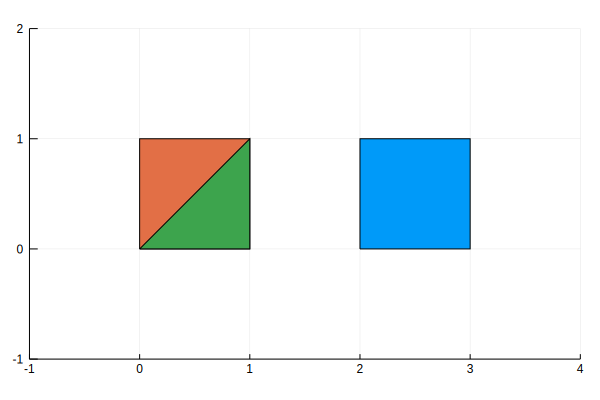

In [4]:
plot1 = plot([p3, p2, p1], xlims=(-1,4), ylims=(-1,2))

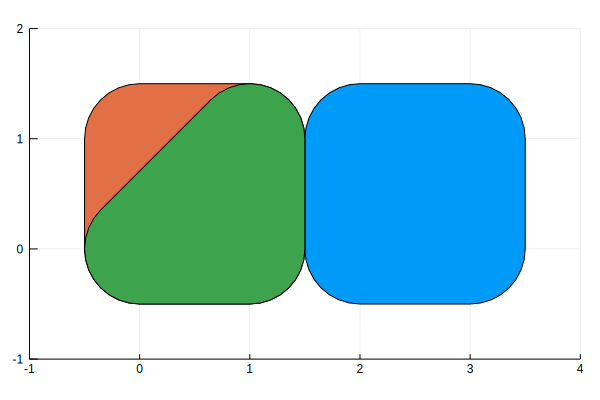

In [5]:
plot2 = plot([g3, g2, g1], xlims=(-1,4), ylims=(-1,2))

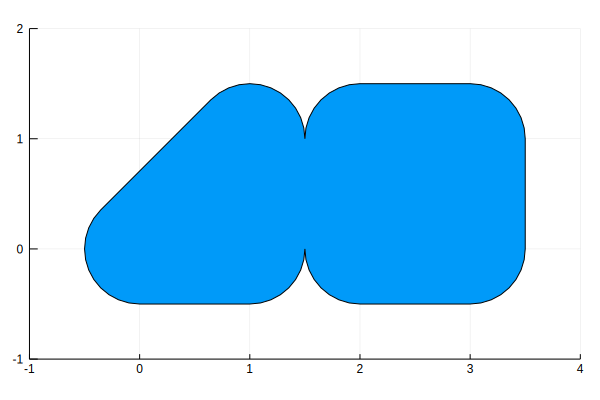

In [6]:
plot3 = plot(polygon, xlims=(-1,4), ylims=(-1,2))

In [7]:
savefig(plot1, "example1.png")
savefig(plot2, "example2.png")
savefig(plot3, "example3.png")

With the help of the `@manipulate` macro from the Interact package, we can explore the effect of the `width` and `quadsegs` arguments of the `buffer` function.

In [8]:
using Interact

INFO: Interact.jl: using new nbwidgetsextension protocol


Interact.Options{:SelectionSlider,Float64}(1: "input" = 0.0 Float64 , "width", 0.0, "0.0", 6, Interact.OptionDict(DataStructures.OrderedDict("-0.5"=>-0.5,"-0.4"=>-0.4,"-0.3"=>-0.3,"-0.2"=>-0.2,"-0.1"=>-0.1,"0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4…), Dict(0.3=>"0.3",-0.2=>"-0.2",-0.3=>"-0.3",0.0=>"0.0",0.2=>"0.2",-0.1=>"-0.1",-0.5=>"-0.5",0.5=>"0.5",0.1=>"0.1",0.4=>"0.4"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Int64}(3: "input-2" = 5 Int64 , "quadsegs", 5, "5", 5, Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(7=>"7",4=>"4",9=>"9",10=>"10",2=>"2",3=>"3",5=>"5",8=>"8",6=>"6",1=>"1"…)), Any[], Any[], true, "horizontal", true)

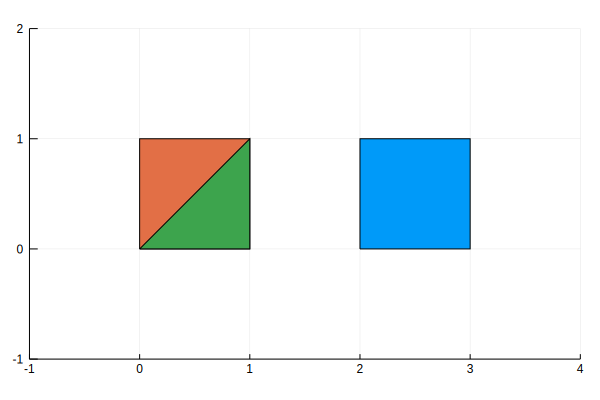

In [9]:
@manipulate for width=-0.5:0.1:0.5, quadsegs=1:10
    plot([buffer(p, width, quadsegs) for p in (p3, p2, p1)],
        xlims=(-1,4), ylims=(-1,2))
end